In [6]:
import pandas as pd #import library pandas untuk manipulasi tabel
import numpy as np # import library numpy untuk operasi numerik yg efisien
import matplotlib.pyplot as plt # import library matplotlib untuk visualisasi data
import seaborn as sns # import library seaborn untuk visualisasi data yg lbh interaktif
from sklearn.linear_model import LogisticRegression # import model regresi logistrik dari sklearn
from sklearn.preprocessing import LabelEncoder # import LabelEncoder untuk mengubah var kategorikal jadi numerik
from sklearn.preprocessing import StandardScaler # import StandardScaler untuk menyesuaikan skala fitur numerik
from sklearn.model_selection import cross_val_score # import cross_val_score untuk evaluasi model menggunakann cross-validation
from sklearn.model_selection import train_test_split # import train_test_split untuk membagi data menjadi set pelatihan dan pengujian
from sklearn import metrics # imporrt metrics dari sklearn untuk evaluasi model
from sklearn.metrics import confusion_matrix # import cunfussion_matrix untuk evaluasi hasil klasifikasi

In [7]:

# baca file csv dan simpan kedlm DataFrame 'df'
df = pd.read_csv('Transformed Data Set - Sheet1.csv')
# tampikan DataFrame 'df' untuk mengecek data
df

,Favorite Color,Favorite Music Genre,Favorite Beverage,Favorite Soft Drink,Gender
0,Cool,Rock,Vodka,7UP/Sprite,F
1,Neutral,Hip hop,Vodka,Coca Cola/Pepsi,F
2,Warm,Rock,Wine,Coca Cola/Pepsi,F
3,Warm,Folk/Traditional,Whiskey,Fanta,F
4,Cool,Rock,Vodka,Coca Cola/Pepsi,F
...,...,...,...,...,...
61,Cool,Rock,Vodka,Coca Cola/Pepsi,M
62,Cool,Hip hop,Beer,Coca Cola/Pepsi,M
63,Neutral,Hip hop,Doesn't drink,Fanta,M
64,Cool,Rock,Wine,Coca Cola/Pepsi,M


In [8]:
# tampilkan ringkasan statistik DataFrame 'df': rata2, standar deiasi, nilai min, nilai max, kuartil setiap kolom numerik
df.describe()

,Favorite Color,Favorite Music Genre,Favorite Beverage,Favorite Soft Drink,Gender
count,66,66,66,66,66
unique,3,7,6,4,2
top,Cool,Rock,Doesn't drink,Coca Cola/Pepsi,F
freq,37,19,14,32,33


In [9]:
# tampilkan info singkat DataFrame 'df': jmlh baris/kolom, nama kolom, tipe data, data null setiap kolom
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66 entries, 0 to 65
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Favorite Color        66 non-null     object
 1   Favorite Music Genre  66 non-null     object
 2   Favorite Beverage     66 non-null     object
 3   Favorite Soft Drink   66 non-null     object
 4   Gender                66 non-null     object
dtypes: object(5)
memory usage: 2.7+ KB


In [10]:
# hitung jmlh nilai null setiap kolom DataFrame 'df'
df.isnull().sum()

Favorite Color          0
Favorite Music Genre    0
Favorite Beverage       0
Favorite Soft Drink     0
Gender                  0
dtype: int64

In [11]:
# menghapus kolom gender dari DataFrame 'df' dan simpan hasilnya ke DataFrame 'X'
X=df.drop(['Gender'],axis=1)
# pilih kolom 'gender' dari DataFrame 'df' dan simpan ke series 'Y'
Y=df['Gender']
# tampilkan jmlh baris/kolom DataFrame'X' dan jmlh elemen series 'Y'
X.shape,Y.shape

((66, 4), (66,))

In [12]:
# bagi dataset menjadi data latih dan data uji
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=0)

In [13]:
# gunakan LabelEncoder untuk mengubah kolom string menjadi numerik
label_encoders = {}
for column in X_train.columns:
    le = LabelEncoder()
    X_train[column] = le.fit_transform(X_train[column])
    X_test[column] = le.transform(X_test[column])
    label_encoders[column]=le

In [14]:
# buat dan latih model Regresi Logistik
model = LogisticRegression()
model.fit(X_train,Y_train)

LogisticRegression()

In [15]:
# cetak koefisien yg diperoleh model regresi logistik yg tlh dilatih, yg menunjukan kontribusi setiap fitur terhadap prediksi kelas
print(model.coef_)

[[-0.25998399 -0.17359937 -0.11960363  0.19734382]]


In [16]:
# gunakan model untuk membuat prediksi kelas pada data uji X_test dan simpan ke series 'Y_pred'
Y_pred = pd.Series(model.predict(X_test))
# reset index dari Y_test untuk memastikan konsistensi saat menggabungkan dengan Y_pred
Y_test = Y_test.reset_index(drop=True)
# gabung series 'Y_test' dan 'Y_pred' secara berdampingan jadi DataFrame 'z'
z = pd.concat([Y_test,Y_pred], axis=1)
# ubah nama kolom DataFrame 'z' jadi 'True' dan 'Prediction'
z.columns = ['True','Prediction']
# tampilkan 5 baris pertama DataFrame 'z' untuk melihat hasil prediksi dan nilai sebenarnya
z.head()

,True,Prediction
0,M,M
1,F,M
2,F,M
3,M,M
4,M,M


In [17]:
# cetak akurasi model ug mengukur seberapa akurat model dlm klasifikasi data uji
print("Accuracy", metrics.accuracy_score(Y_test,Y_pred))
# cetak presisi dari model untuk kelas 'M' yg mengukur seberapa tepat model dlm klasifikasi data positif
print("Precision", metrics.precision_score(Y_test,Y_pred,pos_label="M"))
# cetak recall dari model untuk kelas 'M', ug mengukkur seberapa banyak data positif yg terklasifikasi dgn benar oleh model
print("Recall", metrics.recall_score(Y_test,Y_pred,pos_label="M"))

Accuracy 0.5714285714285714
Precision 0.75
Recall 0.6


In [18]:
# cetak akurasi model ug mengukur seberapa akurat model dlm klasifikasi data uji
print("Accuracy", metrics.accuracy_score(Y_test,Y_pred))
# cetak presisi dari model untuk kelas 'F' yg mengukur seberapa tepat model dlm klasifikasi data positif
print("Precision", metrics.precision_score(Y_test,Y_pred,pos_label="F"))
# cetak recall dari model untuk kelas 'F', ug mengukkur seberapa banyak data positif yg terklasifikasi dgn benar oleh model
print("Recall", metrics.recall_score(Y_test,Y_pred,pos_label="F"))

Accuracy 0.5714285714285714
Precision 0.3333333333333333
Recall 0.5


Text(0.5, 23.52222222222222, 'True')

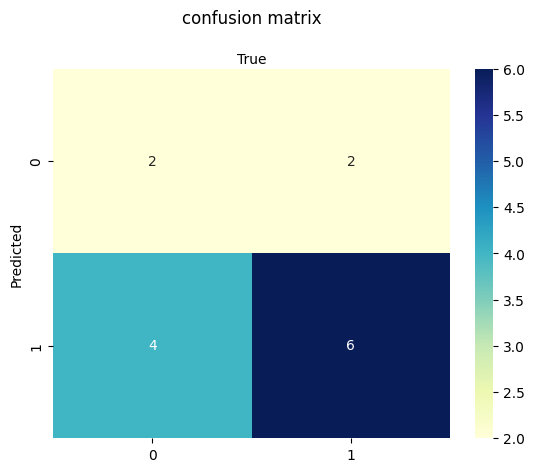

In [19]:
# hitung matriks kebingungan dari prediksi model terhadap nilai uji
cnf_matrix = metrics.confusion_matrix(Y_test, Y_pred)
# label untuk sumbu x dan y pada heatmap
labels = [0, 1]
# buat subplots untuk plot heatmap
fig,ax = plt.subplots()
# mengatur tanda2 sumbu x dan y berdasarkan jmlh label
tick_marks = np.arange(len(labels))
# menentukan tanda sumbu x berdasarkan label
plt.xticks(tick_marks,labels)
# menentukan tanda sumbu y berdasarkan label
plt.yticks(tick_marks,labels)
# buat heatmap
sns.heatmap(pd.DataFrame(cnf_matrix),annot=True,cmap="YlGnBu",fmt='g')
# mengatur posisi label sumbu x ke atas heatmap 
ax.xaxis.set_label_position("top")
# tentukan judul heatmap
plt.title('confusion matrix',y=1.1)
# tentukan label sumbu y sbg 'Predicted'
plt.ylabel('Predicted')
# tentukan label sumbu x sbg 'True'
plt.xlabel('True')

In [20]:
import joblib # import modul joblib untuk menympan model ke file
# simpan model ke dlm file 'pertemuan6.joblib' (harus sama dengan nama file ipynb) menggunakan joblib.dump
joblib.dump(model, "pertemuan6.joblib") 

['pertemuan6.joblib']